In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# Initialize the training and validation generators

train_dir = r"C:\Users\prash\Downloads\Python project\PA\archive (3)\train"
test_dir = r"C:\Users\prash\Downloads\Python project\PA\archive (3)\test"
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagenerator.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [24]:
# Building the CNN architecture
# with four conv2D layers, two dense layers and one flatten layer

recognition_model = Sequential()

recognition_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
recognition_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Flatten())
recognition_model.add(Dense(1024, activation='relu'))
recognition_model.add(Dropout(0.5))
recognition_model.add(Dense(7, activation='softmax'))

In [25]:
recognition_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [26]:

cv2.ocl.setUseOpenCL(False)

In [29]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Initial learning rate
initial_learning_rate = 0.0001

# Learning rate decay setup
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Use the learning rate scheduler in the optimizer
optimizer = Adam(learning_rate=lr_schedule)

# Compile your model
recognition_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])


In [31]:

recognition_model_info = recognition_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=60,
        validation_data=test_generator,
        validation_steps=7178 // 64)

448/448 [==============================] - 358s 798ms/step - loss: 1.7978 - accuracy: 0.2626 - val_loss: 1.7040 - val_accuracy: 0.3414


In [32]:
# Saving the trained Model Weights

recognition_model.save_weights('recognition_model.h5')

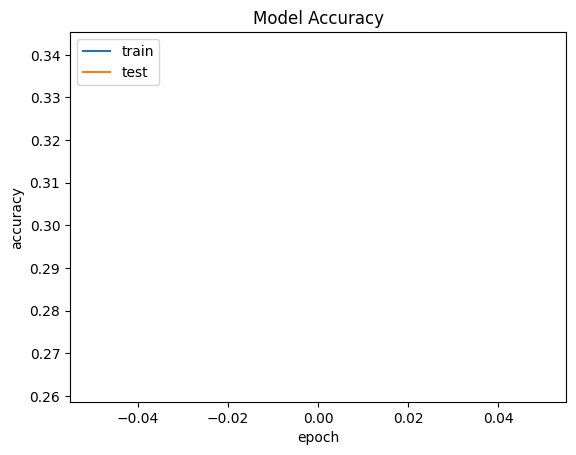

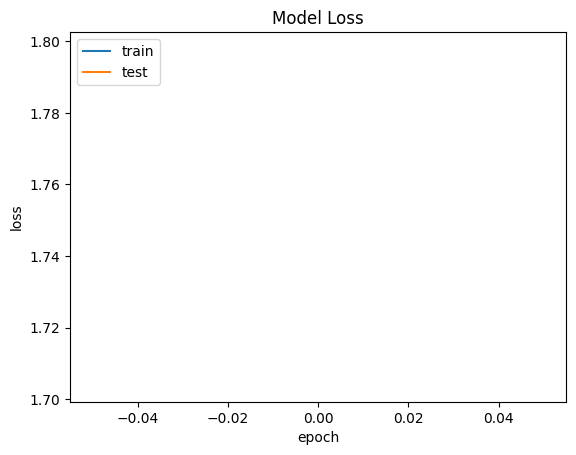

In [33]:
# Summarize history for accuracy

plt.title('Model Accuracy')
plt.plot(recognition_model_info.history['accuracy'])
plt.plot(recognition_model_info.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss

plt.title('Model Loss')
plt.plot(recognition_model_info.history['loss'])
plt.plot(recognition_model_info.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
# Facial emotion Dictonary with values

facial_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output

cap = cv2.VideoCapture(0)

try:
    while True:
        # Read frame from the video capture
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale for face detection
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Load the cascade for face detection
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)
        
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            # Face ROI
            roi_gray = gray_frame[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            
            # Here you can add your model's prediction and annotation
            
        # Convert BGR image to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame
        plt.figure(figsize=(10,8))
        plt.imshow(frame_rgb)
        plt.axis('off')  # Turn off axis
        plt.show()
        
        # Clear the output after each display
        clear_output(wait=True)

except KeyboardInterrupt:  # Allows you to stop the loop with a keyboard interrupt
    print("Stream stopped.")
finally:
    cap.release()
    # cv2.destroyAllWindows() # This line is not needed and should be removed or commented out.


Stream stopped.


In [39]:
# Importing Required Libraries

import tkinter as tk
from tkinter import *
from PIL import Image, ImageTk
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [40]:
# Build the convolution network architecture

face_model = Sequential()
face_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
face_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
face_model.add(MaxPooling2D(pool_size=(2, 2)))
face_model.add(Dropout(0.25))
face_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
face_model.add(MaxPooling2D(pool_size=(2, 2)))
face_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
face_model.add(MaxPooling2D(pool_size=(2, 2)))
face_model.add(Dropout(0.25))
face_model.add(Flatten())
face_model.add(Dense(1024, activation='relu'))
face_model.add(Dropout(0.5))
face_model.add(Dense(7, activation='softmax'))

In [41]:
# Load the saved weights

face_model.load_weights('recognition_model.h5')

In [42]:
# Disable OpenCL

cv2.ocl.setUseOpenCL(False)

In [43]:
# Create Datasets Dictionaries

facial_dict = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}
emojis_dict = {0:"emojis/angry.png", 1:"emojis/disgusted.png", 2:"emojis/fearful.png", 3:"emojis/happy.png", 4:"emojis/neutral.png", 5:"emojis/sad.png", 6:"emojis/surprised.png"}

In [44]:
# Global variables for 

global last_frame1                         
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]

In [45]:
# Function to get face captured and recognize emotion

def Capture_Image():
    global cap1
    cap1 = cv2.VideoCapture(0)
    if not cap1.isOpened():
        print("Unable to open the camera !")
    flag1, frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500))
    # It will detect the face in the video and bound it with a rectangular box
    bound_box = cv2.CascadeClassifier('haarcascades_cuda/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    n_faces = bound_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in n_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_frame = gray_frame[y:y + h, x:x + w]
        crop_img = np.expand_dims(np.expand_dims(cv2.resize(roi_frame, (48, 48)), -1), 0)
        prediction = face_model.predict(crop_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, facial_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex

    if flag1 is None:
        print ("Error!")

    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB) #to store the image   
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, Capture_Image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()

In [46]:
# Function for showing Emoji According to Facial Expression

def Get_Emoji():
    frame2=cv2.imread(emojis_dict[show_text[0]])
    pic2=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain3.configure(text=facial_dict[show_text[0]],font=('arial',45,'bold'))
    lmain2.configure(image=imgtk2)
    lmain2.after(10, Get_Emoji)

In [58]:
import tkinter as tk
from tkinter import Label, Button
from PIL import Image, ImageTk
import cv2

class EmojifyApp:
    def __init__(self, root):
        self.root = root
        self.setup_ui()

    def setup_ui(self):
        self.root.title("Emojify")
        self.root.geometry("800x600")
        self.root['bg'] = 'black'

        # Heading
        self.heading = Label(self.root, text="Emojify", pady=20, font=('arial', 45, 'bold'), bg='black', fg='#CDCDCD')
        self.heading.pack()

        # Image display label
        self.image_label = Label(self.root, padx=50, bd=10)
        self.image_label.pack(pady=20)

        # Emoji display label
        self.emoji_label = Label(self.root, bd=10, fg="#CDCDCD", bg='black', font=('arial', 24, 'bold'), text="😊")
        self.emoji_label.pack(pady=20)

        # Capture and Display Button
        self.capture_button = Button(self.root, text="Capture & Emojify", command=self.capture_and_display_image, font=('arial', 20, 'bold'), bg='grey', fg='white')
        self.capture_button.pack(side=tk.BOTTOM, pady=20)

        # Quit Button
        self.quit_button = Button(self.root, text='Quit', command=self.root.destroy, font=('arial', 20, 'bold'), bg='red', fg='white')
        self.quit_button.pack(side=tk.BOTTOM, pady=10)

    def capture_and_display_image(self):
        # Capture an image
        cap = cv2.VideoCapture(0)
        ret, frame = cap.read()
        cap.release()

        if ret:
            cv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(cv_img)
            imgTk = ImageTk.PhotoImage(image=img)

            # Update the image_label with new PhotoImage
            self.image_label.imgtk = imgTk
            self.image_label.configure(image=imgTk)
            
            # For simplicity, using a static emoji update here
            self.emoji_label.configure(text="😊")

if __name__ == '__main__':
    root = tk.Tk()
    app = EmojifyApp(root)
    root.mainloop()


SyntaxError: invalid syntax (2044481089.py, line 1)